In [40]:
import os
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


FILENAME = 'results/results6.csv'
TESTDIR = 'tests/test6_unfix_c6'
PLOTDIR = 'tests/test6_unfix_c6/plots'
FORMAT = 'png'

# Create target Directory if don't exist
if not os.path.exists(PLOTDIR):
    os.mkdir(PLOTDIR)
    print("Directory " , PLOTDIR ,  " Created ")

In [ ]:
''' Merge csv files '''

dlist = []
dirs = [d for d in os.listdir(TESTDIR) if os.path.isdir(os.path.join(TESTDIR,d))]
for d in dirs:
	d = os.path.abspath(TESTDIR+'/'+d)
	dlist += [os.path.join(d,file) for file in os.listdir(d) if file.endswith(".csv")]

df = pd.read_csv(dlist[0], skipinitialspace=True)
for x in range(1,len(dlist)):
    df = df.append(pd.read_csv(dlist[x], skipinitialspace=True))
df.to_csv(FILENAME,index=False)

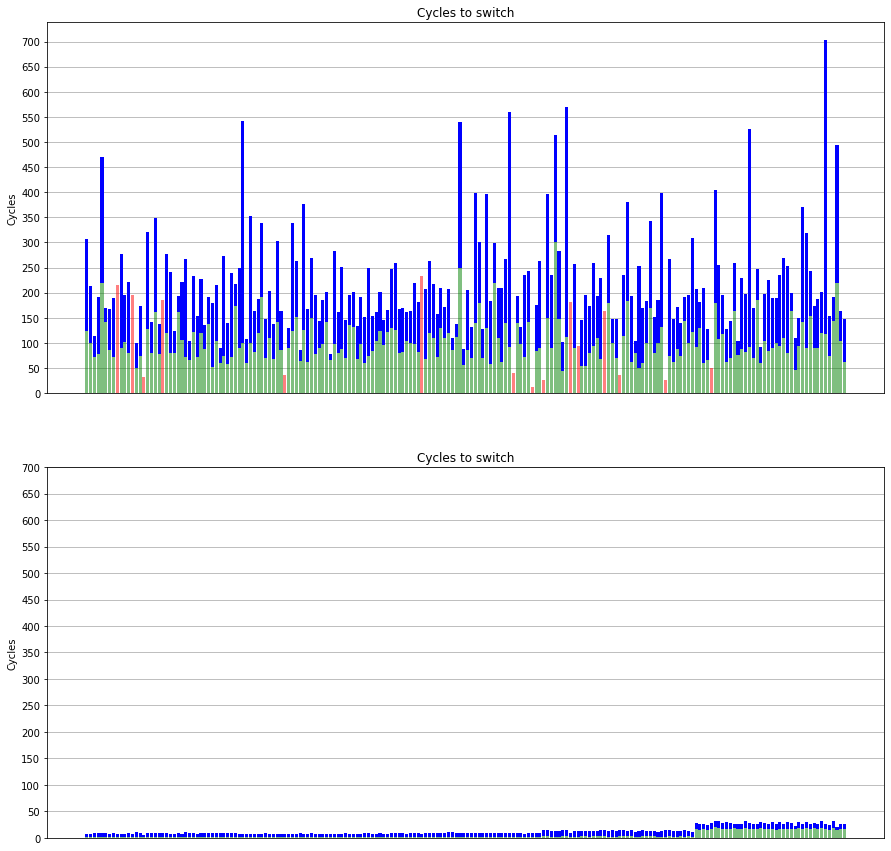

In [2]:
''' Cycles to switch (both succ and not) '''

df = pd.read_csv(FILENAME, skipinitialspace=True)
df_s = df.loc[df['method']=='switch']

random = df_s[df_s['structure'].str.contains(
		"rat") == False]
# random = random.loc[random['method'] == 0] # random (may not have managed to switch)
rattled = df_s[df_s['structure'].str.contains(
		"rat") == True]
# rattled = rattled.loc[rattled['switch'] > 0] # rattled

fig, axs = plt.subplots(2,figsize=(15,15))

ind0 = np.arange(len(random))    # the x locations for the groups
ind1 = np.arange(len(rattled))


# Random

axs[0].grid(zorder=0)
count = 0
for index,row in random.iterrows():         
    if row['switch'] > 0: # managed to switch
        if row['opt_succ'] == True:
            p1 = axs[0].bar(ind0[count], row['switch'], color='green', 
                       zorder=3, alpha=0.5) # successful
        else:
            p1b = axs[0].bar(ind0[count], row['switch'], color='red',
                           zorder=3, alpha=0.5) 
        p2 = axs[0].bar(ind0[count], row['cycles']-row['switch'], # cycles after switch
                         bottom=row['switch'], color='blue',
                            zorder=3)
    else: # never switched algorithm
        if row['opt_succ'] == True:
            p1 = axs[0].bar(ind0[count], row['cycles'], color='green', 
                       zorder=3, alpha=0.5) # successful
        else:
            p1b = axs[0].bar(ind0[count], row['cycles'], color='red',
                           zorder=3, alpha=0.5)
    count += 1

axs[0].set_ylabel('Cycles')
axs[0].set_title('Cycles to switch')
axs[0].set_xticks([])

p1b = None
if p1b:
    axs[0].legend((p1[0], p1b[0], p2[0]), ('Successful', 'Failed', 'After Switch'))
    
    
# Rattled

diff = rattled['cycles']-rattled['switch'] # cycles after switch

axs[1].grid(zorder=0)
count = 0
for index,row in rattled.iterrows():
    if row['switch'] > 0: # managed to switch
        if row['opt_succ'] == True:
            p1 = axs[1].bar(ind1[count], row['switch'], color='green', 
                       zorder=3, alpha=0.5) # successful
        else:
            p1b = axs[1].bar(ind1[count], row['switch'], color='red',
                           zorder=3, alpha=0.5) 
        p2 = axs[1].bar(ind1[count], row['cycles']-row['switch'], # cycles after switch
                         bottom=row['switch'], color='blue',
                            zorder=3)
    else: # never switched algorithm
        if row['opt_succ'] == True:
            p1 = axs[1].bar(ind1[count], row['cycles'], color='green', 
                       zorder=3, alpha=0.5) # successful
        else:
            p1b = axs[1].bar(ind1[count], row['cycles'], color='red',
                           zorder=3, alpha=0.5)
    count += 1

start0, end0 = axs[0].get_ylim()
start1, end1 = axs[1].get_ylim()    

start = min(start0, start1)
end = max(end0, end1)+1
stepsize = 50
axs[0].yaxis.set_ticks(np.arange(start, end, stepsize))
axs[1].yaxis.set_ticks(np.arange(start, end, stepsize))

axs[1].set_ylabel('Cycles')
axs[1].set_title('Cycles to switch')
axs[1].set_xticks([])

if p1b:
    axs[1].legend((p1[0], p1b[0], p2[0]), ('Successful', 'Failed', 'After Switch'))

plt.savefig(PLOTDIR+'/'+'CyclesSw', format=FORMAT)
plt.show()

In [ ]:
''' Cycles to switch (both succ and not) '''
''' with change to stepsize '''

df = pd.read_csv(FILENAME, skipinitialspace=True)
df_s = df.loc[df['method']=='switch_o']

random = df_s[df_s['structure'].str.contains(
		"rat") == False]
# random = random.loc[random['method'] == 0] # random (may not have managed to switch)
rattled = df_s[df_s['structure'].str.contains(
		"rat") == True]
# rattled = rattled.loc[rattled['switch'] > 0] # rattled

fig, axs = plt.subplots(2,figsize=(15,15))

ind0 = np.arange(len(random))    # the x locations for the groups
ind1 = np.arange(len(rattled))


# Random

axs[0].grid(zorder=0)
count = 0
for index,row in random.iterrows():         
    if row['switch'] > 0: # managed to switch
        if row['opt_succ'] == True:
            p1 = axs[0].bar(ind0[count], row['switch'], color='green', 
                       zorder=3, alpha=0.5) # successful
        else:
            p1b = axs[0].bar(ind0[count], row['switch'], color='red',
                           zorder=3, alpha=0.5) 
        p2 = axs[0].bar(ind0[count], row['cycles']-row['switch'], # cycles after switch
                         bottom=row['switch'], color='blue',
                            zorder=3)
    else: # never switched algorithm
        if row['opt_succ'] == True:
            p1 = axs[0].bar(ind0[count], row['cycles'], color='green', 
                       zorder=3, alpha=0.5) # successful
        else:
            p1b = axs[0].bar(ind0[count], row['cycles'], color='red',
                           zorder=3, alpha=0.5)
    count += 1

axs[0].set_ylabel('Cycles')
axs[0].set_title('Cycles to switch')
axs[0].set_xticks([])

p1b = None
if p1b:
    axs[0].legend((p1[0], p1b[0], p2[0]), ('Successful', 'Failed', 'After Switch'))
    
    
# Rattled

diff = rattled['cycles']-rattled['switch'] # cycles after switch

axs[1].grid(zorder=0)
count = 0
for index,row in rattled.iterrows():
    if row['switch'] > 0: # managed to switch
        if row['opt_succ'] == True:
            p1 = axs[1].bar(ind1[count], row['switch'], color='green', 
                       zorder=3, alpha=0.5) # successful
        else:
            p1b = axs[1].bar(ind1[count], row['switch'], color='red',
                           zorder=3, alpha=0.5) 
        p2 = axs[1].bar(ind1[count], row['cycles']-row['switch'], # cycles after switch
                         bottom=row['switch'], color='blue',
                            zorder=3)
    else: # never switched algorithm
        if row['opt_succ'] == True:
            p1 = axs[1].bar(ind1[count], row['cycles'], color='green', 
                       zorder=3, alpha=0.5) # successful
        else:
            p1b = axs[1].bar(ind1[count], row['cycles'], color='red',
                           zorder=3, alpha=0.5)
    count += 1

start0, end0 = axs[0].get_ylim()
start1, end1 = axs[1].get_ylim()    

start = min(start0, start1)
end = max(end0, end1)+1
stepsize = 50
axs[0].yaxis.set_ticks(np.arange(start, end, stepsize))
axs[1].yaxis.set_ticks(np.arange(start, end, stepsize))

axs[1].set_ylabel('Cycles')
axs[1].set_title('Cycles to switch')
axs[1].set_xticks([])

if p1b:
    axs[1].legend((p1[0], p1b[0], p2[0]), ('Successful', 'Failed', 'After Switch'))

plt.savefig(PLOTDIR+'/'+'CyclesSw_o', format=FORMAT)
plt.show()

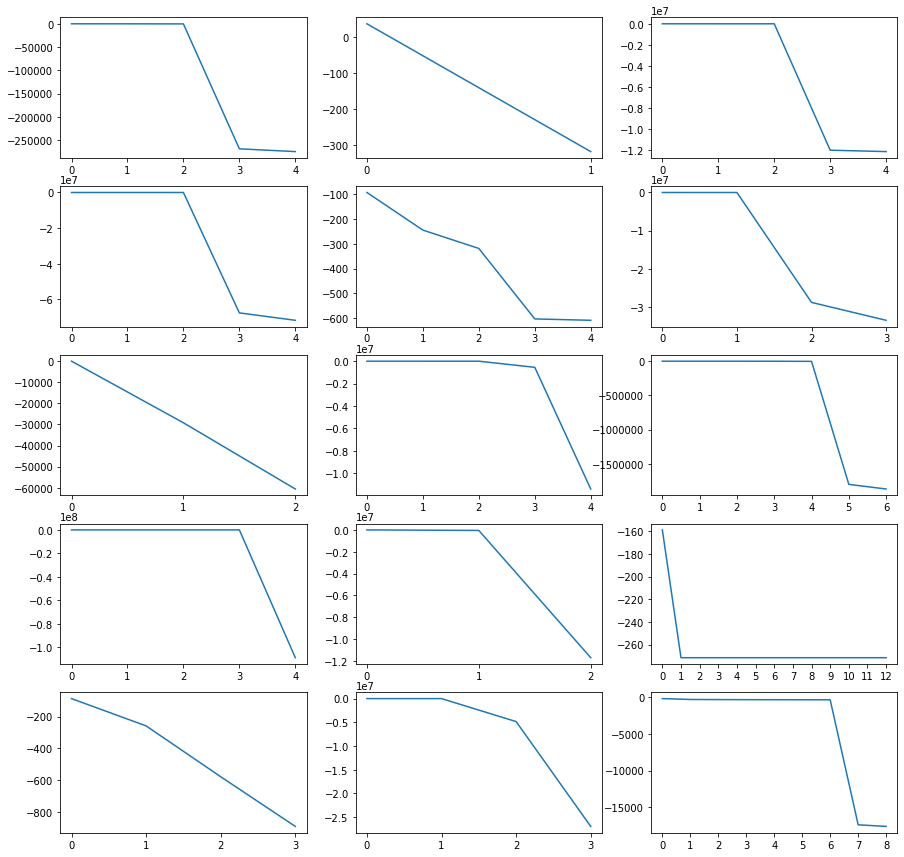

In [99]:
''' Energy Iterations of failures '''

df = pd.read_csv(FILENAME, skipinitialspace=True)
df = df.loc[df['method']=='switch'][['structure','opt_succ']]

filename = 'iters'
dfe = pd.read_csv(TESTDIR+'/'+filename+'_energy.csv', skipinitialspace=True)

df = df.set_index('structure')
dfe_m = dfe[dfe['method'] == 'switch'].set_index('structure') # results for this method 
e_res = dfe_m.join(df, on='structure') # join on each struct

# find failed cases
e_fail = e_res.loc[e_res['opt_succ'] == False]
e_fail = e_fail.drop(['opt_succ'], axis=1)

gs = gridspec.GridSpec(5, 3)
fig = plt.figure(figsize=(15,15))

count = 0
axs = []
for index,row in e_fail.iterrows():
    axs = plt.subplot(gs[int(count/3),count%3])
    y = row.T.dropna().drop('method')
    axs.plot(y)

    count += 1

 
# axs[0].grid()
# axs[0].set_title('Iterations of Successful Optimisation')
# axs[0].set_xlim(0, xticks+5)
# axs[0].set_xticks(np.arange(0, xticks+5, 25))
# starty, endy = axs[0].get_ylim()

# axs[1].grid()
# axs[1].set_ylim(starty, -300)
# axs[1].set_xlim(0, 125)
# axs[1].set_xticks(np.arange(0, 125, 5))

# axs[2].grid()
# axs[2].set_xlim(0, xticks+5)
# axs[2].set_xticks(np.arange(0, xticks+5, 25))
# axs[2].set_title('Iterations of Failed Optimisation')

# axs[3].grid()
# axs[3].set_ylim(-500000, 20000)
# axs[3].set_xlim(0, 75)
# axs[3].set_xticks(np.arange(0, 75, 5))

# fig.text(-0.1, 2.5, 'Energy (eV)', horizontalalignment='center',
#       verticalalignment='center',rotation=90, transform=plt.gca().transAxes)
# fig.text(0.5, -0.5, 'Steps', horizontalalignment='center',
#       verticalalignment='center', transform=plt.gca().transAxes)

# plt.savefig(PLOTDIR+'/'+'MeanEnergyIterI', format=FORMAT)
# plt.show()
